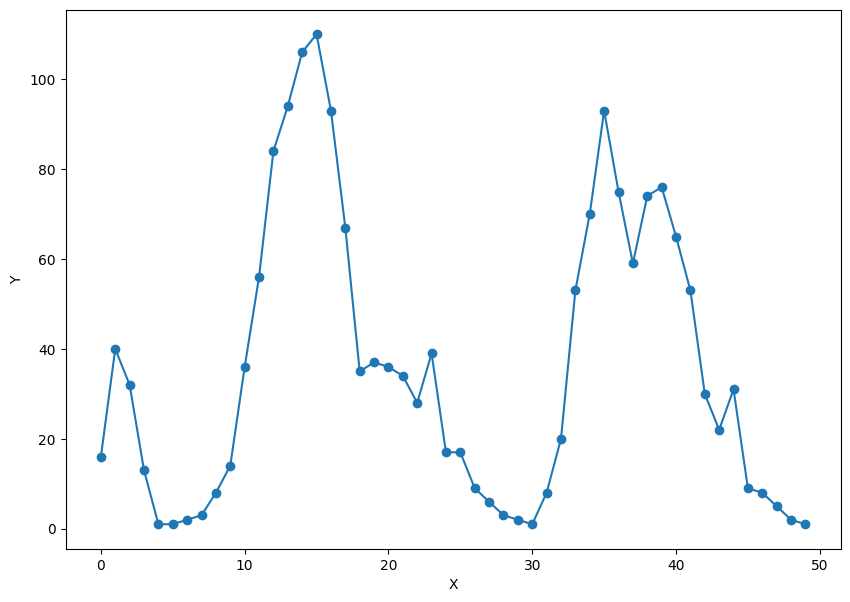

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

%matplotlib inline

data_path = '03_bike_sharing_dataset/hour.csv'
rides = pd.read_csv(data_path)
rides.head()

counts = rides['cnt'][:50]
x = np.arange(len(counts))
y = np.array(counts)

plt.figure(figsize=(10, 7))
plt.plot(x, y, 'o-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [2]:
# 测试隐含层的矩阵加法
arr = torch.IntTensor(np.array([[1,2,3], [4,5,6]]))
ad = torch.IntTensor(np.array([1,1,1]))
result = arr + ad
print(result)

tensor([[2, 3, 4],
        [5, 6, 7]], dtype=torch.int32)


loss:  tensor(2497.5740, grad_fn=<MeanBackward0>)
loss:  tensor(912.8461, grad_fn=<MeanBackward0>)
loss:  tensor(636.5375, grad_fn=<MeanBackward0>)
loss:  tensor(447.0703, grad_fn=<MeanBackward0>)
loss:  tensor(216.0506, grad_fn=<MeanBackward0>)
loss:  tensor(114.2769, grad_fn=<MeanBackward0>)
loss:  tensor(76.5196, grad_fn=<MeanBackward0>)
loss:  tensor(61.1113, grad_fn=<MeanBackward0>)
loss:  tensor(53.2939, grad_fn=<MeanBackward0>)
loss:  tensor(48.4008, grad_fn=<MeanBackward0>)
loss:  tensor(45.3373, grad_fn=<MeanBackward0>)
loss:  tensor(43.2517, grad_fn=<MeanBackward0>)
loss:  tensor(41.7625, grad_fn=<MeanBackward0>)
loss:  tensor(40.6501, grad_fn=<MeanBackward0>)
loss:  tensor(39.7732, grad_fn=<MeanBackward0>)
loss:  tensor(39.0645, grad_fn=<MeanBackward0>)
loss:  tensor(38.4738, grad_fn=<MeanBackward0>)
loss:  tensor(37.9730, grad_fn=<MeanBackward0>)
loss:  tensor(37.5403, grad_fn=<MeanBackward0>)
loss:  tensor(37.1612, grad_fn=<MeanBackward0>)


Text(0, 0.5, 'Loss')

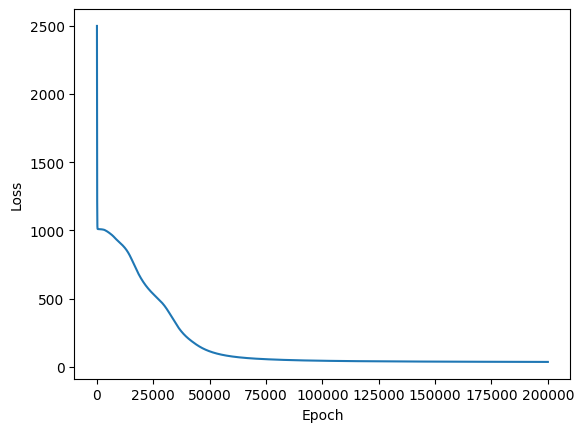

In [3]:
# build neural networkabs
x = torch.FloatTensor(np.arange(len(counts), dtype = float) / len(counts)) # 设置到（0，1）范围，可以快速地将sigmoid的峰值调节到期望的位置
y = torch.FloatTensor(np.array(counts, dtype = float))

sz = 10 # number of neurons in implicit layer
weights = torch.randn((1, sz), requires_grad = True) # input -> implicit
biases = torch.randn((sz), requires_grad = True)
weights2 = torch.randn((sz, 1), requires_grad = True) # implicit -> output

learning_rate = 0.001
losses = []  #方便后续绘图
x = x.view(50, -1) #扩展到50*1
y = y.view(50, -1)

for i in range(200_000):
    #hidden = x.expand(sz, len(x)).t() * weights.expand(len(x), sz) + biases.expand(len(x), sz) #50个数据点，10个神经元
    hidden = x * weights + biases

    hidden = torch.sigmoid(hidden)

    predictions = hidden.mm(weights2) #输出层

    loss = torch.mean((predictions - y) ** 2)
    losses.append(loss.data.numpy())

    if i % 10000 == 0:
        print('loss: ', loss)

    #*********************************************
    #梯度下降算法，反向传播误差
    loss.backward()

    # 利用梯度信息更新参数
    weights.data.add_(- learning_rate * weights.grad.data)
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)

    # 清空Variable的梯度值
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

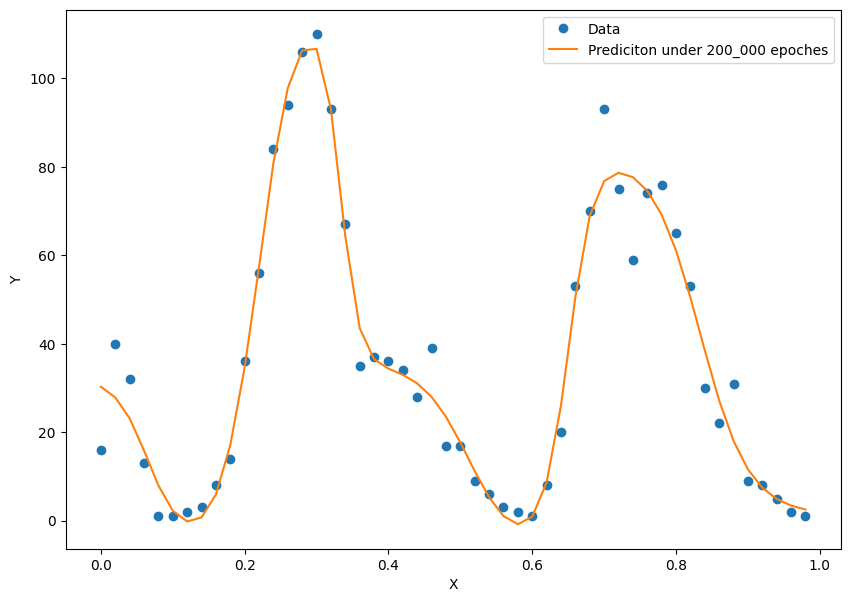

In [4]:
# 绘制训练后的针对训练数据集的预测值曲线
x_data = x.data.numpy()
plt.figure(figsize=(10, 7))

real_plot, = plt.plot(x_data, y.data.numpy(), 'o')
pred_plot, = plt.plot(x_data, predictions.data.numpy())

plt.xlabel('X')
plt.ylabel('Y')
plt.legend([real_plot, pred_plot], ['Data', 'Prediciton under 200_000 epoches'])
plt.show()

tensor(7344.8311, grad_fn=<MeanBackward0>)


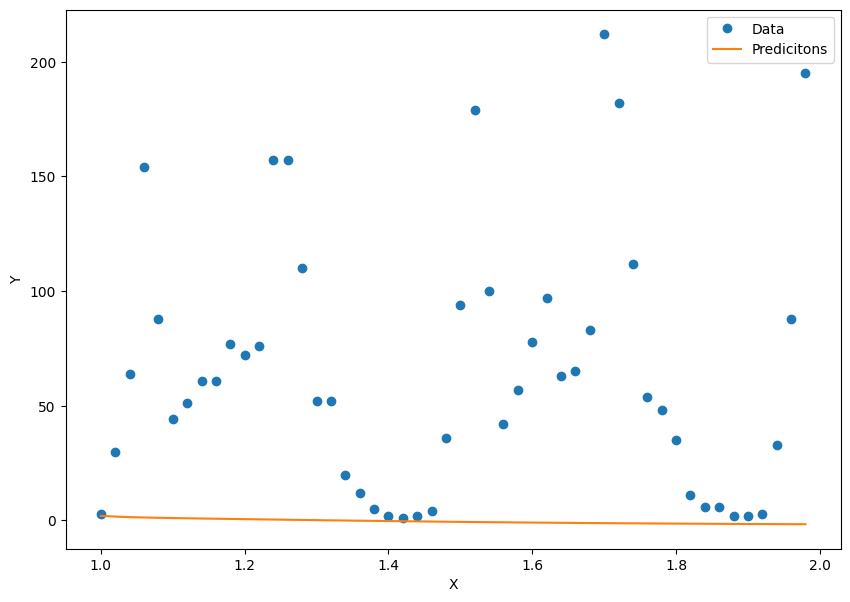

In [5]:
# 使用训练好的模型类做预测，选取待预测的后面50个数据点
counts_predict = rides['cnt'][50:100]
x = torch.FloatTensor((np.arange(len(counts_predict), dtype = float) + len(counts)) / len(counts))
y = torch.FloatTensor(np.array(counts_predict, dtype = float))
x = x.view(50, -1) #扩展到50*1
y = y.view(50, -1)

hidden = x * weights + biases

hidden = torch.sigmoid(hidden)

predictions = hidden.mm(weights2) #输出层

loss = torch.mean((predictions - y) ** 2)
print(loss)

# 绘制训练后的针对测试数据集的预测值曲线
x_data = x.data.numpy()
plt.figure(figsize=(10, 7))

real_plot, = plt.plot(x_data, y.data.numpy(), 'o')
pred_plot, = plt.plot(x_data, predictions.data.numpy())

plt.xlabel('X')
plt.ylabel('Y')
plt.legend([real_plot, pred_plot], ['Data', 'Predicitons'])
plt.show()